# Determinación distancia entre dos bases de datos

## 0. Se cargan las bibliotecas

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## 1. Se leen los datos y se definen los parametros relevantes

In [2]:
# Datos de AMB
data_AMB = pd.read_excel("datos_procesados_local_amb.xlsx")

# Datos de los sensores low cost
data_LOW_COST = pd.read_excel("datos_procesados_local_low_cost.xlsx")

In [3]:
data_AMB

,Time,AMB
0,2018-10-01 00:00:00,6.4
1,2018-10-01 01:00:00,6.4
2,2018-10-01 02:00:00,6.7
3,2018-10-01 03:00:00,6
4,2018-10-01 04:00:00,7.3
...,...,...
8025,2019-08-31 19:00:00,20.4
8026,2019-08-31 20:00:00,18.7
8027,2019-08-31 21:00:00,22.8
8028,2019-08-31 22:00:00,25.2


In [4]:
data_LOW_COST

,Time,Low-cost
0,2018-11-03 23:32:49.639,9.083333
1,2018-11-03 23:37:50.639,9.083333
2,2018-11-03 23:42:50.639,8.583334
3,2018-11-03 23:47:49.641,8.666667
4,2018-11-03 23:52:49.638,8.666666
...,...,...
5003,2019-09-01 00:02:50.912,6.166667
5004,2019-09-01 01:02:49.911,7.833333
5005,2019-09-01 02:02:49.912,5.416667
5006,2019-09-01 03:02:49.912,5.750000


In [5]:
# Se convierten las fechas a formato datetime

data_AMB['Time']      = pd.to_datetime(data_AMB['Time'])
data_LOW_COST['Time'] = pd.to_datetime(data_LOW_COST['Time'])


# Se convierten en la columna de índices de los datos

data_AMB      = data_AMB.set_index('Time')
data_LOW_COST = data_LOW_COST.set_index('Time')

# Se eliminan las filas con ceros en los archivos
data_AMB      = data_AMB.dropna()
data_LOW_COST = data_LOW_COST.dropna()

In [6]:
# Parametros del código

## Intervalos inferior y superior del tiempo de AMB y low-cost
a1 = data_AMB.index[0]
b1 = data_AMB.index[-1]

a2 = data_LOW_COST.index[0]
b2 = data_LOW_COST.index[-1]

## Longitud de la ventana
l = datetime.timedelta(hours=5)

## Largo del paso
Eps = datetime.timedelta(hours=1)

## Lista que contendrá los errores entre los puntos promedios de low-cost y AMB
Errores = []

In [25]:
(b1-a1-l)/Eps

8034.0

In [28]:
8034*Eps+a1+l

Timestamp('2019-08-31 23:00:00')

In [29]:
b1

Timestamp('2019-08-31 23:00:00')

## 2. Analisis de los datos

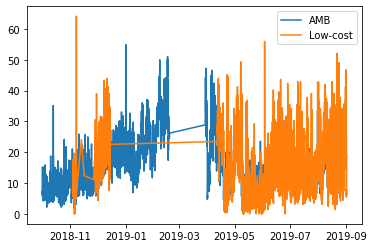

In [7]:
for i in range(len(data_AMB['AMB'])):
    if data_AMB['AMB'][i] == 'NoData':
        data_AMB['AMB'][i] = None
    if data_AMB['AMB'][i] == '---':
        data_AMB['AMB'][i] = None
    if data_AMB['AMB'][i] == '<Samp':
        data_AMB['AMB'][i] = None
data_AMB2 = data_AMB.dropna()
plt.plot(data_AMB2, label='AMB')
plt.plot(data_LOW_COST, label='Low-cost')
plt.legend()

In [8]:
Intervalos = []
aux = data_AMB2.index[0]
for i in range(len(data_AMB2)-1):
    if data_AMB2.index[i+1] - data_AMB2.index[i] > datetime.timedelta(hours=2):
        Intervalos.append([aux, data_AMB2.index[i]])
        aux = data_AMB2.index[i+1]
Intervalos.append([aux, data_AMB2.index[-1]])
Intervalos

[[Timestamp('2018-10-01 00:00:00'), Timestamp('2018-12-31 23:00:00')],
 [Timestamp('2019-01-01 02:00:00'), Timestamp('2019-02-18 04:00:00')],
 [Timestamp('2019-03-29 14:00:00'), Timestamp('2019-04-04 16:00:00')],
 [Timestamp('2019-04-04 20:00:00'), Timestamp('2019-08-31 23:00:00')]]

In [37]:
data_LOW_COST_reduce = pd.DataFrame({},columns=['Time','Low-cost'])
data_LOW_COST_reduce = data_LOW_COST_reduce.set_index('Time')
for i in range(len(data_LOW_COST)):
    date = data_LOW_COST.index[i] 
    if (date >= Intervalos[0][0]) and (date <= Intervalos[0][1]):
        data_LOW_COST_reduce = data_LOW_COST_reduce.append( pd.DataFrame({'Low-cost':float(data_LOW_COST.values[i][0])}, index=[date]) )
    elif (date >= Intervalos[3][0]) and (date <= Intervalos[3][1]):
        data_LOW_COST_reduce = data_LOW_COST_reduce.append( pd.DataFrame({'Low-cost':float(data_LOW_COST.values[i][0])}, index=[date]) )
    elif (date >= Intervalos[1][0]) and (date <= Intervalos[1][1]):
        data_LOW_COST_reduce = data_LOW_COST_reduce.append( pd.DataFrame({'Low-cost':float(data_LOW_COST.values[i][0])}, index=[date]) )
    elif (date >= Intervalos[2][0]) and (date <= Intervalos[2][1]):
        data_LOW_COST_reduce = data_LOW_COST_reduce.append( pd.DataFrame({'Low-cost':float(data_LOW_COST.values[i][0])}, index=[date]) )

data_LOW_COST_reduce

,Low-cost
2018-11-03 23:32:49.639,9.083333
2018-11-03 23:37:50.639,9.083333
2018-11-03 23:42:50.639,8.583334
2018-11-03 23:47:49.641,8.666667
2018-11-03 23:52:49.638,8.666666
...,...
2019-08-31 18:02:49.911,26.750002
2019-08-31 19:03:00.227,26.833332
2019-08-31 20:02:50.911,32.333336
2019-08-31 21:02:49.911,32.416668


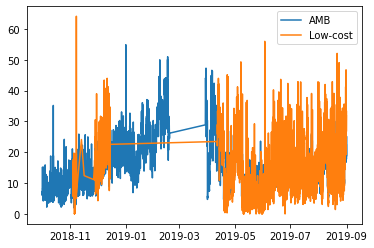

In [38]:
plt.plot(data_AMB2, label='AMB')
plt.plot(data_LOW_COST_reduce, label='Low-cost')
plt.legend()

## 3. Funciones y rutinas

In [ ]:
for i in range( int() )